1. Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

bottle_df = pd.read_csv("bottle.csv")
bottle_df

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
cast_df = pd.read_csv("cast.csv")
cast_df.head()

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [19]:
print(bottle_df.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DICQualityComment'],
      dtype='object')


In [20]:
print(bottle_df.describe())

             Cst_Cnt        Btl_Cnt         Depthm         T_degC  \
count  864863.000000  864863.000000  864863.000000  853900.000000   
mean    17138.790958  432432.000000     226.831951      10.799677   
std     10240.949817  249664.587267     316.050259       4.243825   
min         1.000000       1.000000       0.000000       1.440000   
25%      8269.000000  216216.500000      46.000000       7.680000   
50%     16848.000000  432432.000000     125.000000      10.060000   
75%     26557.000000  648647.500000     300.000000      13.880000   
max     34404.000000  864863.000000    5351.000000      31.140000   

              Salnty         O2ml_L         STheta          O2Sat  \
count  817509.000000  696201.000000  812174.000000  661274.000000   
mean       33.840350       3.392468      25.819394      57.103779   
std         0.461843       2.073256       1.167787      37.094137   
min        28.431000      -0.010000      20.934000      -0.100000   
25%        33.488000       1.3600

In [3]:
#remove any spaces
bottle_df.columns = bottle_df.columns.str.replace(' ', '')
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DICQualityComment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#drop rows of 50+ NaNs
noNaN_bottle_df = bottle_df.dropna(axis=0, thresh=50)
noNaN_bottle_df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DICQualityComment
674906,27546,674907,090.0 028.0,19-9310NM-PR-290-1902-09000280-0002A-3,2,19.260,33.2010,5.950,23.58200,112.40,...,0.38,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674907,27546,674908,090.0 028.0,19-9310NM-PR-290-1902-09000280-0005A-3,5,19.200,33.1990,5.970,23.59600,112.70,...,0.38,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674908,27546,674909,090.0 028.0,19-9310NM-PR-290-1902-09000280-0009A-3,9,18.880,33.2150,6.000,23.68900,112.50,...,0.38,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674910,27546,674911,090.0 028.0,19-9310NM-PR-290-1902-09000280-0013A-3,13,16.570,33.2570,6.030,24.27800,108.20,...,0.22,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674911,27546,674912,090.0 028.0,19-9310NM-PR-290-1902-09000280-0019A-3,19,15.960,33.2340,6.190,24.40000,109.70,...,0.27,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860736,34251,860737,093.3 045.0,20-16045S-PR-092-1729-09330450-0002A-3,2,16.298,33.5456,5.731,24.56225,102.47,...,0.05,2,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862015,34297,862016,086.8 032.5,20-1607OS-MX-198-1114-08680325-0005A-3,5,20.955,33.6050,5.761,23.44628,112.57,...,0.14,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862805,34327,862806,093.3 110.0,20-1607OS-PR-194-1755-09331100-0017A-3,17,19.162,33.3609,5.394,23.73049,101.80,...,0.01,17,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862979,34334,862980,076.7 070.0,20-1611SR-PR-324-1700-07670700-0074A-3,74,11.083,33.2459,4.564,25.39864,73.10,...,0.09,75,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#drop columns with 225+ NaNs
noNaNs_bottle_df = noNaN_bottle_df.dropna(axis=1, thresh=225)
noNaNs_bottle_df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES,R_SAMP
674906,27546,674907,090.0 028.0,19-9310NM-PR-290-1902-09000280-0002A-3,2,19.260,33.2010,5.950,23.58200,112.40,...,5.95,112.4,3.0,0.31,0.2,0.01,1.02,0.38,2,NaN
674907,27546,674908,090.0 028.0,19-9310NM-PR-290-1902-09000280-0005A-3,5,19.200,33.1990,5.970,23.59600,112.70,...,5.97,112.7,2.8,0.31,0.2,0.01,1.10,0.38,5,NaN
674908,27546,674909,090.0 028.0,19-9310NM-PR-290-1902-09000280-0009A-3,9,18.880,33.2150,6.000,23.68900,112.50,...,6.00,112.5,2.8,0.31,0.1,0.01,1.09,0.38,9,NaN
674910,27546,674911,090.0 028.0,19-9310NM-PR-290-1902-09000280-0013A-3,13,16.570,33.2570,6.030,24.27800,108.20,...,6.03,108.2,2.1,0.34,0.1,0.00,0.50,0.22,13,NaN
674911,27546,674912,090.0 028.0,19-9310NM-PR-290-1902-09000280-0019A-3,19,15.960,33.2340,6.190,24.40000,109.70,...,6.19,109.7,2.2,0.36,0.1,0.00,0.61,0.27,19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860736,34251,860737,093.3 045.0,20-16045S-PR-092-1729-09330450-0002A-3,2,16.298,33.5456,5.731,24.56225,102.47,...,5.73,102.5,1.8,0.30,0.0,0.03,0.25,0.05,2,24.0
862015,34297,862016,086.8 032.5,20-1607OS-MX-198-1114-08680325-0005A-3,5,20.955,33.6050,5.761,23.44628,112.57,...,5.76,112.6,1.6,0.11,0.0,0.00,0.69,0.14,5,3.0
862805,34327,862806,093.3 110.0,20-1607OS-PR-194-1755-09331100-0017A-3,17,19.162,33.3609,5.394,23.73049,101.80,...,5.39,101.8,1.9,0.26,0.0,0.00,0.06,0.01,17,22.0
862979,34334,862980,076.7 070.0,20-1611SR-PR-324-1700-07670700-0074A-3,74,11.083,33.2459,4.564,25.39864,73.10,...,4.56,73.1,10.4,1.16,14.2,0.00,0.07,0.09,75,14.0


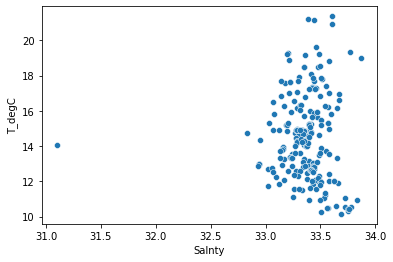

In [39]:
sns.scatterplot(x="Salnty", y="T_degC", data=noNaNs_bottle_df)
plt.show()

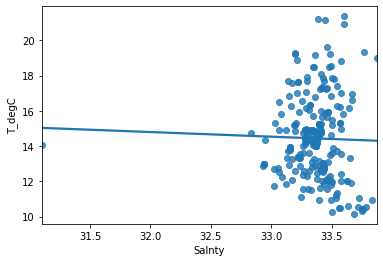

In [49]:
sns.regplot(x="Salnty", y="T_degC", data=noNaNs_bottle_df, ci=None)
plt.show()

2. Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

In [34]:
corrMatrix = noNaNs_bottle_df.corr()
print(corrMatrix)

              Cst_Cnt   Btl_Cnt    Depthm    T_degC    Salnty    O2ml_L  \
Cst_Cnt      1.000000  0.999666 -0.101565 -0.001578 -0.046355  0.063582   
Btl_Cnt      0.999666  1.000000 -0.099253 -0.009849 -0.043408  0.063886   
Depthm      -0.101565 -0.099253  1.000000 -0.489102  0.071088 -0.487830   
T_degC      -0.001578 -0.009849 -0.489102  1.000000 -0.025922  0.365955   
Salnty      -0.046355 -0.043408  0.071088 -0.025922  1.000000 -0.323766   
O2ml_L       0.063582  0.063886 -0.487830  0.365955 -0.323766  1.000000   
STheta      -0.010855 -0.001840  0.469025 -0.949042  0.334172 -0.415353   
O2Sat        0.047878  0.045246 -0.572183  0.643960 -0.264100  0.947196   
Oxy_µmol/Kg  0.063853  0.064101 -0.489194  0.369973 -0.324635  0.999987   
RecInd       0.119231  0.119677 -0.245979 -0.019605 -0.055930  0.135312   
T_prec      -0.018898 -0.016598 -0.057039  0.035118 -0.004132  0.014258   
S_prec       0.087369  0.084882 -0.162832  0.080880  0.028614  0.019837   
ChlorA      -0.158007 -0.

Water temperature (T_degC) seems to be highly correlated with the Potential Density of Water (STheta), Phosphate Quality Code (PO4uM), Reported Potential Temprature (R_POTEMP), Reported Phosphate Concentration (R_PO4), Reported Specific Volume Anomaly (R_SVA), and Reported Potential Density of Water (R_SIGMA).

3. Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [35]:
from statsmodels.formula.api import ols

mdl_temp_vs_sal = ols("T_degC ~ Salnty", data=noNaNs_bottle_df).fit()
print(mdl_temp_vs_sal.params)

Intercept    23.204483
Salnty       -0.262730
dtype: float64


4. Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics .

In [37]:
print(mdl_temp_vs_sal.rsquared)

0.0006719378034143464


With R2 values

In [38]:
mse = mdl_temp_vs_sal.mse_resid
print(mse)

5.2562305617514715


5. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

In [45]:
explan_data = pd.DataFrame({"Salnty": np.arange(31, 34, 0.1)})

predict = mdl_temp_vs_sal.predict(explan_data)

print(predict)

0     15.059839
1     15.033566
2     15.007293
3     14.981020
4     14.954747
5     14.928474
6     14.902201
7     14.875928
8     14.849655
9     14.823382
10    14.797108
11    14.770835
12    14.744562
13    14.718289
14    14.692016
15    14.665743
16    14.639470
17    14.613197
18    14.586924
19    14.560651
20    14.534378
21    14.508105
22    14.481832
23    14.455559
24    14.429286
25    14.403013
26    14.376740
27    14.350467
28    14.324194
29    14.297921
dtype: float64


In [47]:
predict_data = explan_data.assign(T_degC=predict)

print(predict_data)

    Salnty     T_degC
0     31.0  15.059839
1     31.1  15.033566
2     31.2  15.007293
3     31.3  14.981020
4     31.4  14.954747
5     31.5  14.928474
6     31.6  14.902201
7     31.7  14.875928
8     31.8  14.849655
9     31.9  14.823382
10    32.0  14.797108
11    32.1  14.770835
12    32.2  14.744562
13    32.3  14.718289
14    32.4  14.692016
15    32.5  14.665743
16    32.6  14.639470
17    32.7  14.613197
18    32.8  14.586924
19    32.9  14.560651
20    33.0  14.534378
21    33.1  14.508105
22    33.2  14.481832
23    33.3  14.455559
24    33.4  14.429286
25    33.5  14.403013
26    33.6  14.376740
27    33.7  14.350467
28    33.8  14.324194
29    33.9  14.297921


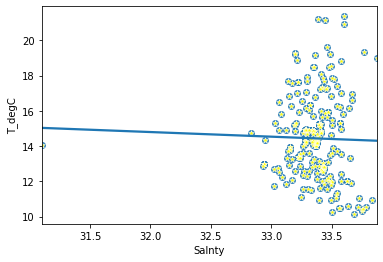

In [50]:
fig=plt.figure()

sns.regplot(x="Salnty", y="T_degC", data=noNaNs_bottle_df, ci=None)

sns.scatterplot(x="Salnty", y="T_degC", data=noNaNs_bottle_df, color="yellow", marker="*")

plt.show()

6. Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

Polynomial regression can be useful instances where there seems to be a relationship between explanatory and responsive variables, but this relationship doesn't appear to be linear - aka, it does not follow a linear regression line very well when plotted.  This is accomplished by transforming one or more input variable by raising it to a power (squaring, cubing, etc.).  Doing so exponentially increases the number of features in your dataset with each additional degree, so it's generally advisable to stick to a degree of 2 or 3.

7. Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [63]:
from sklearn.preprocessing import PolynomialFeatures

X = predict_data["Salnty"].values
y = predict_data["T_degC"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[31.  31.1 31.2 31.3 31.4 31.5 31.6 31.7 31.8 31.9 32.  32.1 32.2 32.3
 32.4 32.5 32.6 32.7 32.8 32.9 33.  33.1 33.2 33.3 33.4 33.5 33.6 33.7
 33.8 33.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

8. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 